In [1]:
import sys
from pathlib import Path

# Go two levels up to reach project root
project_root = Path.cwd().parents[1]  # from subfolder/ to notebook_folder/ to project_root/
scripts_path = project_root / "scripts"

if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

In [2]:
from scripts.general_scripts.features_engineering import quicky_data, lag_features_indicators
from scripts.general_scripts.lstm import LSTMModelMultiOutput
from scripts.general_scripts.helper import CustomizedLoss
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from scripts.general_scripts.model_shorcut import test_predict
from render_app.run_test_predict import main

2025-07-01 22:13:19 [ERROR] Importing plotly failed. Interactive plots will not work.
2025-07-01 22:13:19 [ERROR] Importing plotly failed. Interactive plots will not work.


In [3]:
scaler = StandardScaler()
model_type = LSTMModelMultiOutput
criterion = CustomizedLoss()
n_lags = 5
n_forecasts = 2
seasonal_periods = 261

Index(['Date', 'VN_Index_Close', 'Total Volume', 'Total Value'], dtype='object')
Seasonality Strength: 0.11


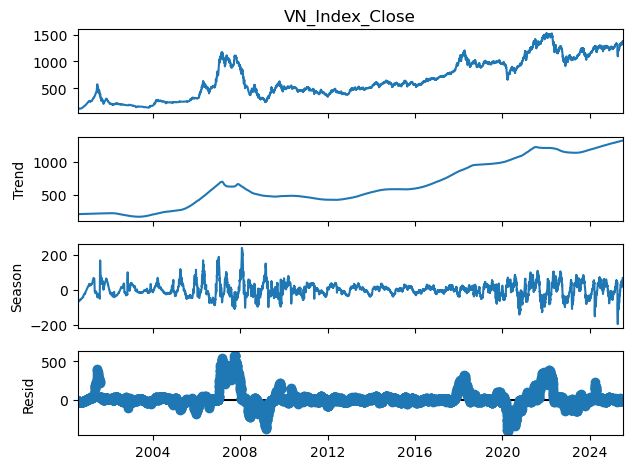

<Figure size 1200x400 with 0 Axes>

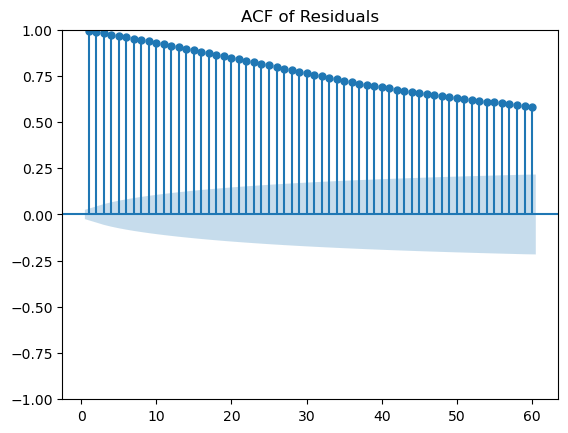

In [4]:
# 📂 Load dataset
file_path_1 = "../../ready_data/vn_index_data/cleaned_vn_index_data.csv"
df = pd.read_csv(file_path_1)
print(df.columns)
df_1 = quicky_data(df.copy(), seasonal_periods, plot=True)

In [5]:
df_1.tail(20)

,VN_Index_Close,Total Volume,Total Value,trend,seasonal,residual,dow_sin,dow_cos,month_sin,month_cos
Date,,,,,,,,,,
2025-06-04,1345.74,1.044891e+09,2.348614e+13,1313.462198,47.483320,-15.205518,0.974928,-0.222521,5.000000e-01,-0.866025
2025-06-05,1342.09,8.190327e+08,1.917002e+13,1313.819204,45.110407,-16.839610,0.433884,-0.900969,5.000000e-01,-0.866025
2025-06-06,1329.89,1.004951e+09,2.401604e+13,1314.176135,35.062226,-19.348361,-0.433884,-0.900969,5.000000e-01,-0.866025
2025-06-09,1310.57,7.926355e+08,1.781947e+13,1314.532993,16.618646,-20.581639,0.000000,1.000000,5.000000e-01,-0.866025
2025-06-10,1316.23,7.843649e+08,1.843090e+13,1314.889775,23.413108,-22.072884,0.781831,0.623490,5.000000e-01,-0.866025
2025-06-11,1315.20,6.065814e+08,1.447254e+13,1315.246484,13.722315,-13.768799,0.974928,-0.222521,5.000000e-01,-0.866025
2025-06-12,1322.99,8.616240e+08,1.979900e+13,1315.603117,19.278635,-11.891752,0.433884,-0.900969,5.000000e-01,-0.866025
2025-06-13,1315.49,1.209001e+09,2.714398e+13,1315.959676,19.757783,-20.227459,-0.433884,-0.900969,5.000000e-01,-0.866025
2025-06-16,1338.11,8.520955e+08,2.104087e+13,1316.316161,30.131158,-8.337319,0.000000,1.000000,5.000000e-01,-0.866025


In [6]:
df.iloc[-21:]

,Date,VN_Index_Close,Total Volume,Total Value
6036,2025-06-03,1347.25,1.156455e+09,2.572575e+13
6037,2025-06-04,1345.74,1.044891e+09,2.348614e+13
6038,2025-06-05,1342.09,8.190327e+08,1.917002e+13
6039,2025-06-06,1329.89,1.004951e+09,2.401604e+13
6040,2025-06-09,1310.57,7.926355e+08,1.781947e+13
6041,2025-06-10,1316.23,7.843649e+08,1.843090e+13
6042,2025-06-11,1315.20,6.065814e+08,1.447254e+13
6043,2025-06-12,1322.99,8.616240e+08,1.979900e+13
6044,2025-06-13,1315.49,1.209001e+09,2.714398e+13
6045,2025-06-16,1338.11,8.520955e+08,2.104087e+13


In [7]:
# final_df, metrics_df, forecast_df = test_predict(df, 20, n_forecasts, seasonal_periods, scaler, 'LSTM', criterion, n_lags)

In [9]:
!which python

/opt/anaconda3/bin/python
